# Test topical evaluations on NEWTS
In this notebook we test how different topical evaluation metrics perform on NEWTS using the corresponding LDA model. 
The goal is to gain a more nuanced understanding of the pros and cons of each of the topical evaluation functions in topical_evaluations.py 

## Import NEWTS

In [1]:
from NEWTS import read

# Load the NEWTS training set
newts_train = read.read_train()

In [2]:
newts_train.head(1)

,AssignmentId,docId,article,tid1,tid2,words1,words2,phrases1,phrases2,sentences1,sentences2,summary1,summary2
0,3EG49X351WE8VLP4S0TIYZF3V476X2,094372190d52acbce61a73ec16b2217d1a60276f,The president of the World Bank on Saturday wa...,175,110,"house, committee, congress, senate, republican...","billion, figures, economy, global, growth, eco...","senate and congress, congressional pressure, y...","economic growth, global growth, billion dollar...","This topic is about the senate and congress, c...",This topic is about economic growth involving ...,The leader of the World Bank urged the US to t...,The US economy will be a driving factor in the...


## Import LDA

In [3]:
import gensim
from gensim import corpora

In [4]:
def load_lda_model(model_address: str):
    # Loads the LDA model and dictionary from the specified address.
    try:
        lda = gensim.models.ldamodel.LdaModel.load(model_address + 'lda.model', mmap='r')
        dictionary = corpora.Dictionary.load(model_address + 'dictionary.dic', mmap='r')
        return lda, dictionary
    except Exception as e:
        print(f"Error loading model or dictionary: {e}")
        return None, None

In [5]:
model_address = "LDA_250/"
lda, dictionary = load_lda_model(model_address)
# Warning "WARNING:root:random_state not set so using default value" is inconsequential for inference

## Import topical evaluation fuctions

In [6]:
import topical_evaluations as top_eval
import matplotlib.pyplot as plt

In [7]:
print(type(newts_train.iloc[0]['tid1']))
print(type(1))

<class 'numpy.int64'>
<class 'int'>


In [20]:
# Example document
index = 23
document = [newts_train.iloc[index]['article']]
tid = [int(newts_train.iloc[index]['tid1'])]

# Stemming
stemmed_score = top_eval.topic_scores(document, lda, tid, 'stem')
print(f"Stemmed Topic Score: {stemmed_score}")

# Lemmatization
lemmatized_score = top_eval.topic_scores(document, lda, tid, 'lemmatize')
print(f"Lemmatized Topic Score: {lemmatized_score}")

# Dictionary
dictionary_score = top_eval.topic_scores(document, lda, tid, 'dict', dictionary)
print(f"Dictionary Topic Score: {dictionary_score}")

Stemmed Topic Score: [0.11556329429210546]
Lemmatized Topic Score: [0.15182498179520534]
Dictionary Topic Score: [0.15110927347753922]


In [9]:
def compare_topic_scores(dataframe, lda, dictionary, min_index, max_index):

    documents = dataframe.iloc[min_index:max_index]['article'].tolist()
    tids = dataframe.iloc[min_index:max_index]['tid1'].astype(int).tolist()

    stemmed_scores = top_eval.topic_scores(documents, lda, tids, 'stem')
    lemmatized_scores = top_eval.topic_scores(documents, lda, tids, 'lemmatize')
    dictionary_scores = top_eval.topic_scores(documents, lda, tids, 'dict', dictionary)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.hist(stemmed_scores, alpha=0.5, label='Stemmed Scores')
    plt.hist(lemmatized_scores, alpha=0.5, label='Lemmatized Scores')
    plt.hist(dictionary_scores, alpha=0.5, label='Dictionary Scores')
    plt.xlabel('Topic Score')
    plt.ylabel('Frequency')
    plt.title('Comparison of Topic Score Distributions')
    plt.legend()
    plt.show()


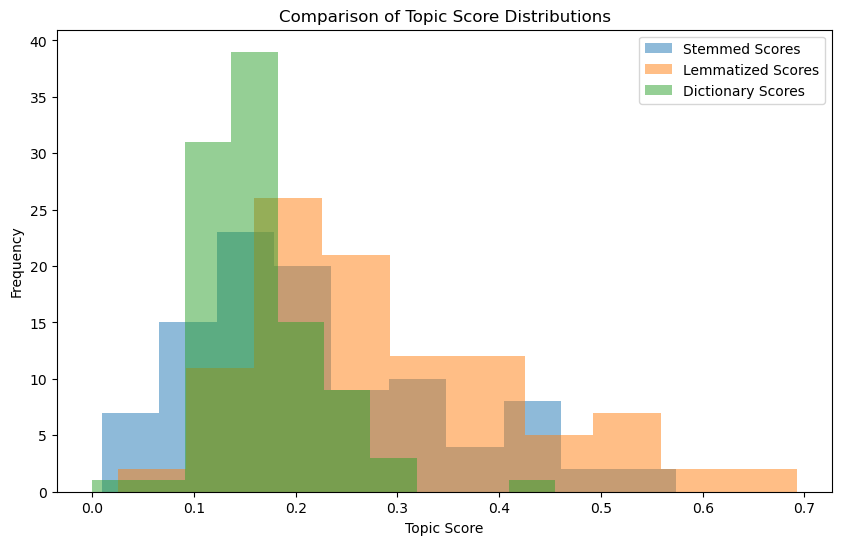

In [10]:
compare_topic_scores(newts_train, lda, dictionary, 0, 100)

In [11]:
# compare score for article, summary1 and summary2 with respect to tid1
def compare_lemmatized_weighted_summary_scores(dataframe, lda, min_index, max_index):

    documents = dataframe.iloc[min_index:max_index]['article'].tolist()
    summaries1 = dataframe.iloc[min_index:max_index]['summary1'].tolist()
    summaries2 = dataframe.iloc[min_index:max_index]['summary2'].tolist()
    tids = dataframe.iloc[min_index:max_index]['tid1'].astype(int).tolist()

    scores_article_lemmatized = top_eval.topic_scores(documents, lda, tids, 'lemmatize')
    scores_summary1_lemmatized = top_eval.topic_scores(summaries1, lda, tids, 'lemmatize')
    scores_summary2_lemmatized = top_eval.topic_scores(summaries2, lda, tids, 'lemmatize')

    plt.figure(figsize=(10, 6))
    plt.hist(scores_article_lemmatized, alpha=0.5, label='Article', bins=50)
    plt.hist(scores_summary1_lemmatized, alpha=0.5, label='Summary 1', bins=50)
    plt.hist(scores_summary2_lemmatized, alpha=0.5, label='Summary 2', bins=50)
    plt.xlabel('Topic Score')
    plt.ylabel('Frequency')
    plt.title('Comparison of Topic Score Distributions with weighted lemmatized scores')
    plt.legend()
    plt.show()

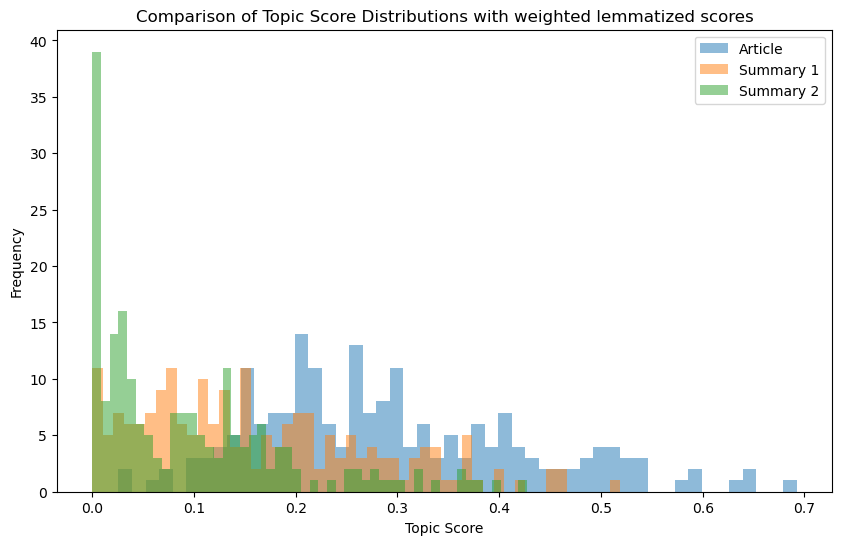

In [13]:
compare_lemmatized_weighted_summary_scores(newts_train, lda, 0, 200)

In [18]:
# compare score for article, summary1 and summary2 with respect to tid1
def compare_stemmed_weighted_summary_scores(dataframe, lda, min_index, max_index):

    documents = dataframe.iloc[min_index:max_index]['article'].tolist()
    summaries1 = dataframe.iloc[min_index:max_index]['summary1'].tolist()
    summaries2 = dataframe.iloc[min_index:max_index]['summary2'].tolist()
    tids = dataframe.iloc[min_index:max_index]['tid1'].astype(int).tolist()

    scores_article_stemmed = top_eval.topic_scores(documents, lda, tids, 'stem')
    scores_summary1_stemmed = top_eval.topic_scores(summaries1, lda, tids, 'stem')
    scores_summary2_stemmed = top_eval.topic_scores(summaries2, lda, tids, 'stem')

    plt.figure(figsize=(10, 6))
    plt.hist(scores_article_stemmed, alpha=0.5, label='Article', bins=50)
    plt.hist(scores_summary1_stemmed, alpha=0.5, label='Summary 1', bins=50)
    plt.hist(scores_summary2_stemmed, alpha=0.5, label='Summary 2', bins=50)
    plt.xlabel('Topic Score')
    plt.ylabel('Frequency')
    plt.title('Comparison of Topic Score Distributions with weighted stemmed scores')
    plt.legend()
    plt.show()

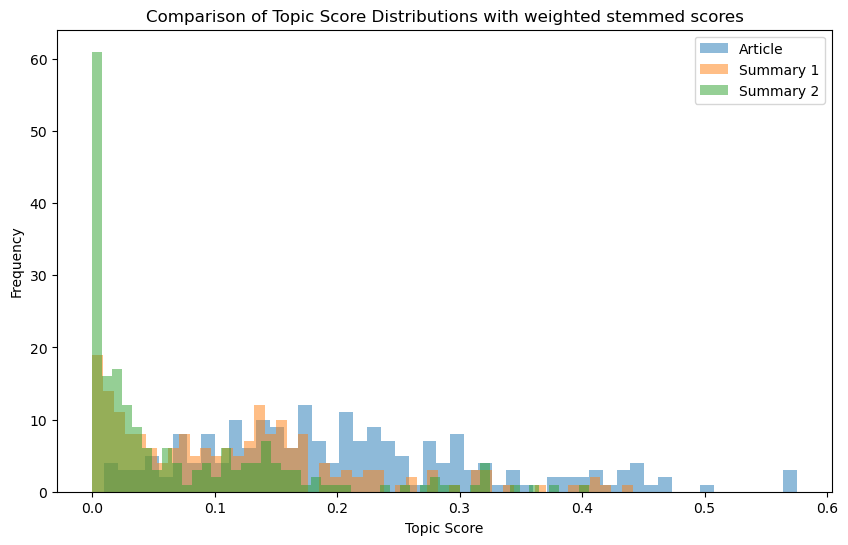

In [19]:
compare_stemmed_weighted_summary_scores(newts_train, lda, 0, 200)

In [16]:
# compare score for article, summary1 and summary2 with respect to tid1
def compare_dict_summary_scores(dataframe, lda, min_index, max_index):
    
    documents = dataframe.iloc[min_index:max_index]['article'].tolist()
    summaries1 = dataframe.iloc[min_index:max_index]['summary1'].tolist()
    summaries2 = dataframe.iloc[min_index:max_index]['summary2'].tolist()
    tids = dataframe.iloc[min_index:max_index]['tid1'].astype(int).tolist()

    scores_article_dict = top_eval.topic_scores(documents, lda, tids, 'dict', dictionary)
    scores_summary1_dict = top_eval.topic_scores(summaries1, lda, tids, 'dict', dictionary)
    scores_summary2_dict = top_eval.topic_scores(summaries2, lda, tids, 'dict', dictionary)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.hist(scores_article_dict, alpha=0.5, label='Article', bins=50)
    plt.hist(scores_summary1_dict, alpha=0.5, label='Summary 1', bins=50)
    plt.hist(scores_summary2_dict, alpha=0.5, label='Summary 2', bins=50)
    plt.xlabel('Topic Score')
    plt.ylabel('Frequency')
    plt.title('Comparison of Topic Score Distributions with dict eval function')
    plt.legend()
    plt.show()

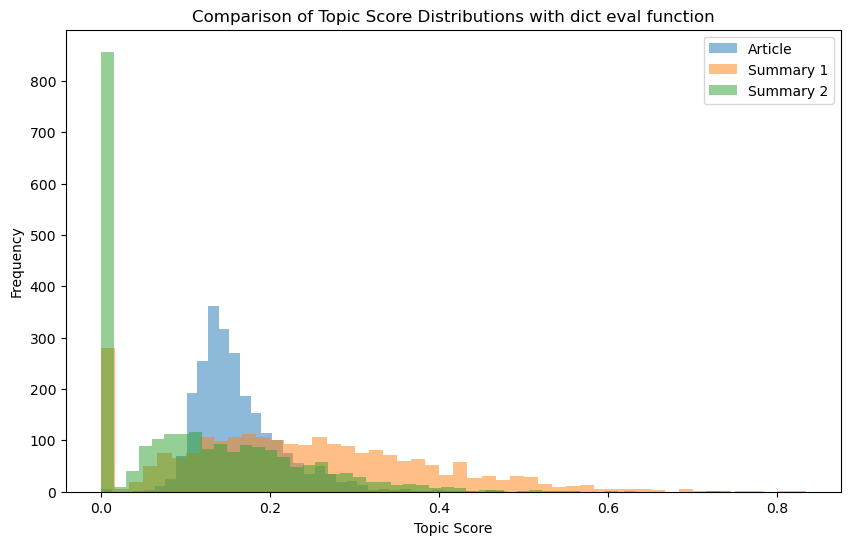

In [17]:
compare_dict_summary_scores(newts_train, lda, 0, 2400)